In [55]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

# Importing Dataframe

In [56]:
path=r'C:\Users\solom\Desktop\Achievement-6 Solomon'

In [57]:
df= pd.read_csv(os.path.join(path, 'Manipulated Data', 'Adidas_sales_clean.csv'), index_col = False)

In [58]:
df_map = r'C:\Users\solom\Desktop\Achievement-6 Solomon\Original data\us_states.json'

In [59]:
df_map

'C:\\Users\\solom\\Desktop\\Achievement-6 Solomon\\Original data\\us_states.json'

In [60]:
# Checking json file
a= open(r'C:\Users\solom\Desktop\Achievement-6 Solomon\Original data\us_states.json',)
# returns json object asa dictionary
data = json.load(a)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

## Data wrangling procedures

In [61]:
df.head()

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Year,Month,Day,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Profit,Margin ratio,Sales Method
0,0,Foot Locker,1185732,1/1/2020,2020,January,1,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000.0,0.50,In-store
1,1,Foot Locker,1185732,1/2/2020,2020,January,2,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000.0,0.30,In-store
2,2,Foot Locker,1185732,1/3/2020,2020,January,3,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000.0,0.35,In-store
3,3,Foot Locker,1185732,1/4/2020,2020,January,4,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875.0,0.35,In-store
4,4,Foot Locker,1185732,1/5/2020,2020,January,5,Northeast,New York,New York,Men's Apparel,60,900,540000,162000.0,0.30,In-store


In [62]:
df.columns

Index(['Unnamed: 0', 'Retailer', 'Retailer ID', 'Invoice Date', 'Year',
       'Month', 'Day', 'Region', 'State', 'City', 'Product', 'Price per Unit',
       'Units Sold', 'Total Sales', 'Profit', 'Margin ratio', 'Sales Method'],
      dtype='object')

In [63]:
df.shape

(9648, 17)

In [64]:
df.dtypes

Unnamed: 0          int64
Retailer           object
Retailer ID         int64
Invoice Date       object
Year                int64
Month              object
Day                 int64
Region             object
State              object
City               object
Product            object
Price per Unit      int64
Units Sold          int64
Total Sales         int64
Profit            float64
Margin ratio      float64
Sales Method       object
dtype: object

## Removing unnecessary columns

In [65]:
df = df.drop(columns=['Unnamed: 0','Invoice Date'])

In [66]:
df.head()

,Retailer,Retailer ID,Year,Month,Day,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Profit,Margin ratio,Sales Method
0,Foot Locker,1185732,2020,January,1,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000.0,0.50,In-store
1,Foot Locker,1185732,2020,January,2,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000.0,0.30,In-store
2,Foot Locker,1185732,2020,January,3,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000.0,0.35,In-store
3,Foot Locker,1185732,2020,January,4,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875.0,0.35,In-store
4,Foot Locker,1185732,2020,January,5,Northeast,New York,New York,Men's Apparel,60,900,540000,162000.0,0.30,In-store


In [67]:
#duplicates
df_dups= df[df.duplicated()]

In [68]:
df_dups

,Retailer,Retailer ID,Year,Month,Day,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Profit,Margin ratio,Sales Method


### No duplicates found

## Extreme values

C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


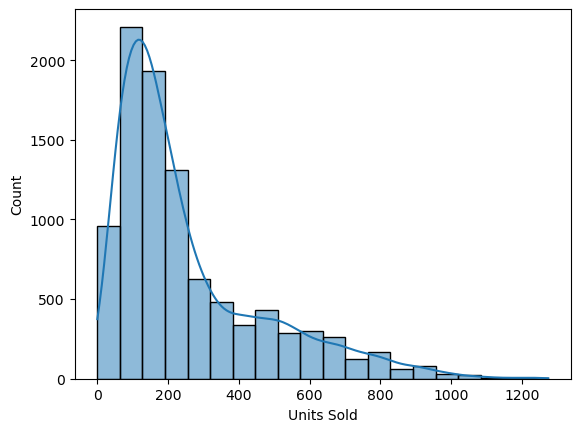

In [69]:
#Created a histogram for extreme values for Units Sold
hist_units = sns.histplot(df['Units Sold'], bins = 20, kde = True)

C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


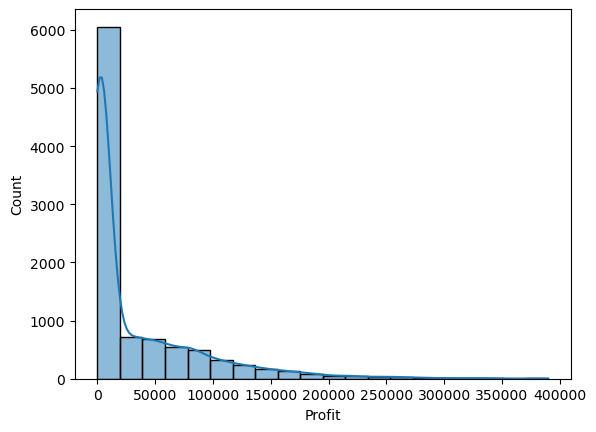

In [70]:
#Created a histogram for extreme values for Profit
hist_profit = sns.histplot(df['Profit'], bins = 20, kde = True)

C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


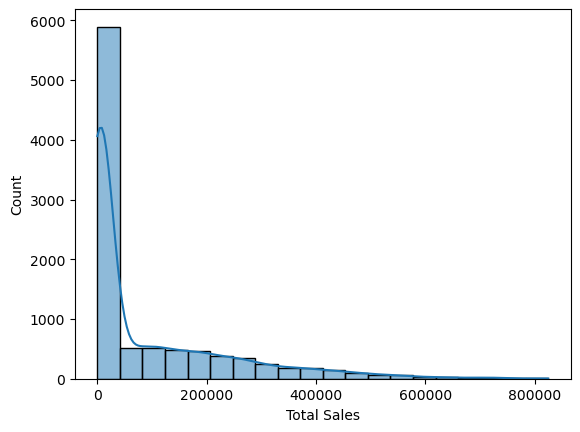

In [71]:
#Created a histogram for extreme values for Total Sales
hist_revenue = sns.histplot(df['Total Sales'], bins = 20, kde = True)

## Chloropeth

In [87]:
#Grouping the states and adding the units sold value for each state
df_group1= df.groupby('State')['Units Sold'].sum().reset_index()

In [88]:
# Creating a data frame with just the states and the values for Units Sold

units_state = df_group1[['State','Units Sold']]
units_state

,State,Units Sold
0,Alabama,63327
1,Alaska,30815
2,Arizona,46919
3,Arkansas,48468
4,California,163284
5,Colorado,41378
6,Connecticut,34696
7,Delaware,30275
8,Florida,133430
9,Georgia,56391


In [89]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = df_map, 
    data = units_state,
    columns = ['State', 'Units Sold'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Unis Sold per State").add_to(map)
folium.LayerControl().add_to(map)

map

In [90]:
# Save the map as an HTML file
map.save('units_sold_state__map.html')

In [91]:
#Grouping the states and adding the Revenue value for each state
df_group2= df.groupby('State')['Total Sales'].sum().reset_index()

In [92]:
# Creating a data frame with just the states and the values for Revenue

revenue_state = df_group2[['State','Total Sales']]
revenue_state

,State,Total Sales
0,Alabama,17633424
1,Alaska,14753103
2,Arizona,15782221
3,Arkansas,12639347
4,California,60174133
5,Colorado,20996536
6,Connecticut,11573448
7,Delaware,12298412
8,Florida,59283714
9,Georgia,18997466


In [93]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = df_map, 
    data = revenue_state,
    columns = ['State', 'Total Sales'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Revenue per State").add_to(map)
folium.LayerControl().add_to(map)

map

In [94]:
# Save the map as an HTML file
map.save('revenue_state__map.html')

In [95]:
#Grouping the states and adding the profit value for each state
df_group3= df.groupby('State')['Profit'].sum().reset_index()

In [96]:
# Creating a data frame with just the states and the values for profit

profit_state = df_group3[['State','Profit']]
profit_state

,State,Profit
0,Alabama,9147581.39
1,Alaska,4498345.86
2,Arizona,5344664.58
3,Arkansas,4915697.91
4,California,19301170.40
5,Colorado,7713555.83
6,Connecticut,4152320.79
7,Delaware,4524350.06
8,Florida,20926206.92
9,Georgia,6893289.61


In [98]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = df_map, 
    data = profit_state,
    columns = ['State', 'Profit'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Profit per State").add_to(map)
folium.LayerControl().add_to(map)

map

In [99]:
# Save the map as an HTML file
map.save('profit_state__map.html')